In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [57]:
df = pd.read_csv('heart.csv')

In [58]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [60]:
df.shape

(303, 14)

In [61]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [63]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [64]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


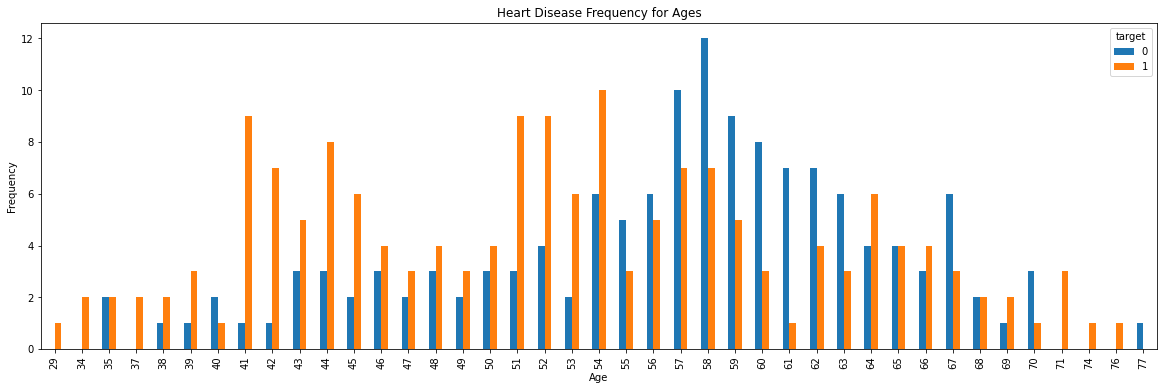

In [65]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [66]:
df.chest_pain_type.unique()

array([3, 2, 1, 0], dtype=int64)

In [67]:
c = df["chest_pain_type"].value_counts()
labels = c.index
fig = px.bar(c, title = "Chest pain type", text = c)
fig.show()

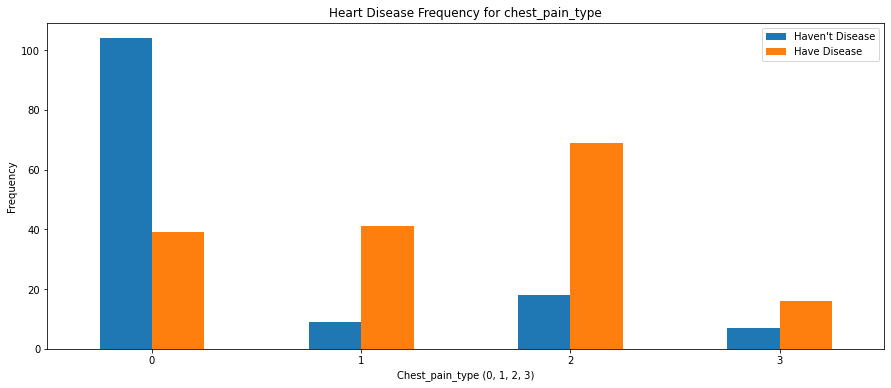

In [68]:
pd.crosstab(df.chest_pain_type,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for chest_pain_type')
plt.xlabel('Chest_pain_type (0, 1, 2, 3)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


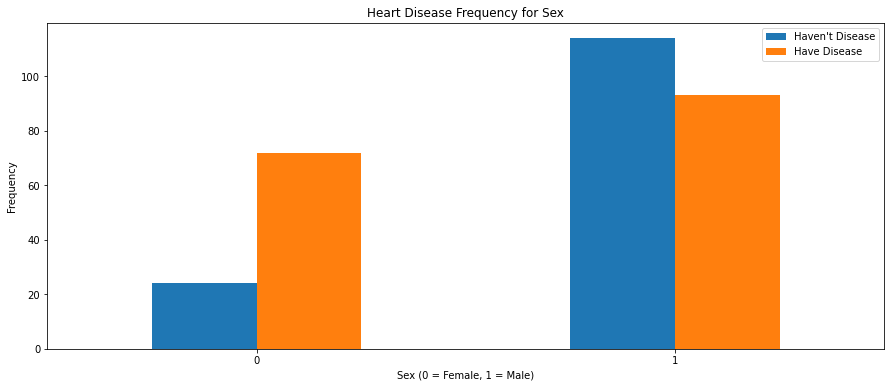

In [69]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [70]:
fig = px.scatter(df, x="age", y="max_heart_rate_achieved", color = "target") 
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='MediumPurple')),
                  selector=dict(mode='markers'))
fig.show()

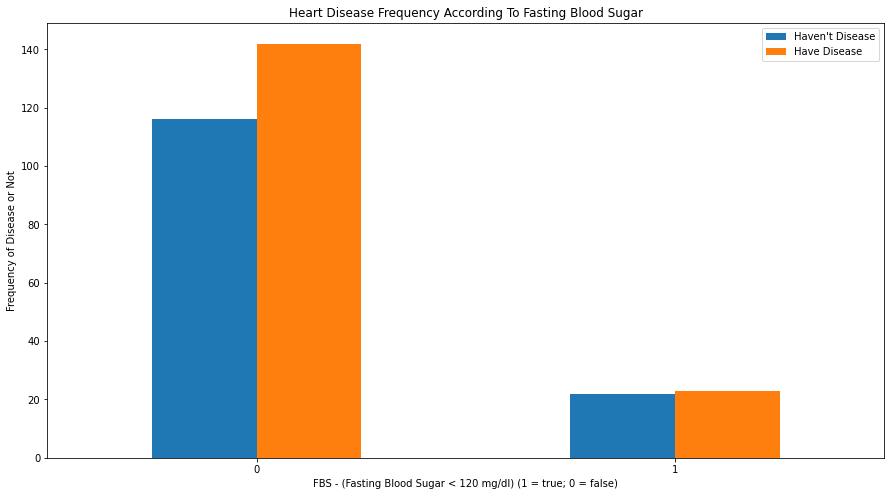

In [71]:
pd.crosstab(df.fasting_blood_sugar 	,df.target).plot(kind="bar",figsize=(15,8))
plt.title('Heart Disease Frequency According To Fasting Blood Sugar')
plt.xlabel('FBS - (Fasting Blood Sugar < 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [72]:
fb = df["fasting_blood_sugar"].value_counts()
labels = fb.index
fig = px.bar(fb, title = "fasting blood sugar", text = fb)
fig.show()

In [73]:
fig = px.scatter(df, x="age", y="cholesterol", color = "target") 
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color= 'DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

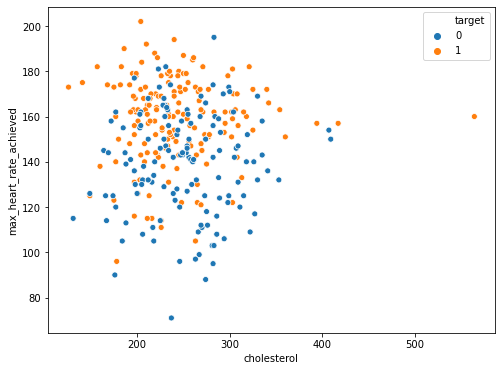

In [74]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='cholesterol',y='max_heart_rate_achieved',data=df,hue='target')
plt.show()

In [75]:
fig = px.scatter(df, x = 'resting_blood_pressure', y = 'cholesterol', title='Cholestrol vs Blood Pressure', 
                 facet_col = 'sex', color = 'target')
fig.show()

In [76]:
#Relation of major_vessels with target = 1
fig = px.bar(df, x = "num_major_vessels", y = "target")
fig.show()

In [77]:
a = pd.get_dummies(df['chest_pain_type'], prefix = "chest_pain_type")
b = pd.get_dummies(df['thalassemia'], prefix = "thalassemia")
c = pd.get_dummies(df['st_slope'], prefix = "st_slope")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,...,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3,st_slope_0,st_slope_1,st_slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [78]:
df = df.drop(columns = ['chest_pain_type', 'thalassemia', 'st_slope'])
df.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,...,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3,st_slope_0,st_slope_1,st_slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [79]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

y = df.target.values
x_data = df.drop(['target'], axis = 1)


scaler = MinMaxScaler()
names = x_data.columns
d = scaler.fit_transform(x_data)
x_normalized = pd.DataFrame(d, columns=names)

num_cols = ['resting_blood_pressure','cholesterol','max_heart_rate_achieved','age']

x_std = x_data.copy()

for i in num_cols:
    
    #fit on training data column
    scaler_std = StandardScaler().fit(x_std[[i]])
    #transform
    x_std[i] = scaler_std.transform(x_std[[i]])

In [80]:
x_std

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,...,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3,st_slope_0,st_slope_1,st_slope_2
0,0.952197,1,0.763956,-0.256334,1,0,0.015443,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,-1.915313,1,-0.092738,0.072199,0,1,1.633471,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,-1.474158,0,-0.092738,-0.816773,0,0,0.977514,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,0.180175,1,-0.663867,-0.198357,0,1,1.239897,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,0.290464,0,-0.663867,2.082050,0,1,0.583939,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0.478391,-0.101730,0,1,-1.165281,1,0.2,0,...,0,0,0,0,0,0,1,0,1,0
299,-1.033002,1,-1.234996,0.342756,0,1,-0.771706,0,1.2,0,...,0,0,1,0,0,0,1,0,1,0
300,1.503641,1,0.706843,-1.029353,1,1,-0.378132,0,3.4,2,...,0,0,0,0,0,0,1,0,1,0
301,0.290464,1,-0.092738,-2.227533,0,1,-1.515125,1,1.2,1,...,0,0,0,0,0,0,1,0,1,0


In [81]:
x_normalized

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,...,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3,st_slope_0,st_slope_1,st_slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.00,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.00,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.00,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
299,0.333333,1.0,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
300,0.812500,1.0,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
301,0.583333,1.0,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [82]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.2,random_state=0)
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_normalized,y,test_size = 0.2,random_state=42)
x_train_std, x_test_std, y_train_std, y_test_std= train_test_split(x_std,y,test_size = 0.2,random_state=27)

In [83]:
x_test_norm.shape,
y_test_norm.shape

(61,)

In [204]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 78.69%


In [85]:
data_train_list = [[x_train.T,y_train.T],[x_train_norm,y_train_norm],[x_train_std,y_train_std]]
data_test_list  =[[x_test.T,y_test.T],[x_test_norm,y_test_norm],[x_test_std,y_test_std]]

rf = RandomForestClassifier(n_estimators = 100, random_state = 0,)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100

print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 86.89%


In [95]:
from sklearn.metrics import confusion_matrix

In [202]:
for (i , j) in zip(data_train_list,data_test_list):
     randf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
     randf.fit(i[0], i[1])
     acc = randf.score(j[0],j[1])*100
     print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 88.52%
Random Forest Algorithm Accuracy Score : 88.52%
Random Forest Algorithm Accuracy Score : 81.97%


In [162]:
y_pred = randf.predict(x_test.T)

In [163]:
cm = confusion_matrix(y_test.T,y_pred)
print(cm)

[[24  3]
 [ 3 31]]


Confusion matrix, without normalization
[[24  3]
 [ 3 31]]


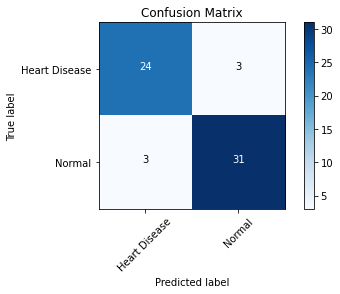

In [164]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Heart Disease','Normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [137]:
for (i , j) in zip(data_train_list,data_test_list):
        knn_classifier = KNeighborsClassifier(n_neighbors = 11)
        knn_classifier.fit(i[0], i[1])
        acc = knn_classifier.score(j[0],j[1])*100
        print("K Nearest Neighbors Algorithm Accuracy Score : {:.2f}%".format(acc))

K Nearest Neighbors Algorithm Accuracy Score : 70.49%
K Nearest Neighbors Algorithm Accuracy Score : 85.25%
K Nearest Neighbors Algorithm Accuracy Score : 83.61%


In [165]:
y_pred = knn_classifier.predict(x_test_norm)

In [166]:
cm = confusion_matrix(y_test_norm,y_pred)
print(cm)

[[22  7]
 [ 2 30]]


Confusion matrix, without normalization
[[22  7]
 [ 2 30]]


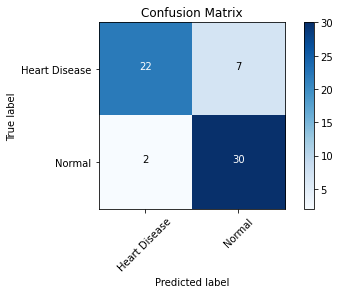

In [167]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Heart Disease','Normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [140]:
from sklearn.linear_model import Perceptron

In [141]:
for (i , j) in zip(data_train_list,data_test_list):
    per = Perceptron(tol=1e-3)
    per.fit(i[0], i[1])
    acc = per.score(j[0],j[1])*100
    print("Perceptron Algorithm Accuracy Score : {:.2f}%".format(acc))
    

Perceptron Algorithm Accuracy Score : 68.85%
Perceptron Algorithm Accuracy Score : 86.89%
Perceptron Algorithm Accuracy Score : 81.97%


In [168]:
y_pred = per.predict(x_test_norm)

In [169]:
cm = confusion_matrix(y_test_norm,y_pred)
print(cm)

[[23  6]
 [ 3 29]]


Confusion matrix, without normalization
[[23  6]
 [ 3 29]]


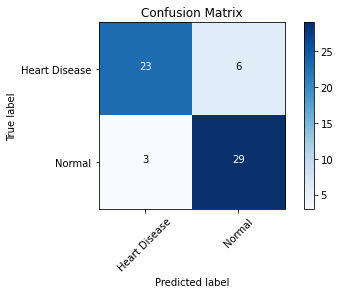

In [170]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Heart Disease','Normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [144]:
for (i , j) in zip(data_train_list,data_test_list):
    rf = LogisticRegression(max_iter=1500)
    rf.fit(i[0], i[1])
    acc = rf.score(j[0],j[1])*100
    print("Logistic Regression Algorithm Accuracy Score : {:.2f}%".format(acc))

Logistic Regression Algorithm Accuracy Score : 85.25%
Logistic Regression Algorithm Accuracy Score : 86.89%
Logistic Regression Algorithm Accuracy Score : 91.80%


In [145]:
cm = confusion_matrix(y_test_std,y_pred)
print(cm)

[[25  2]
 [ 3 31]]


Confusion matrix, without normalization
[[25  2]
 [ 3 31]]


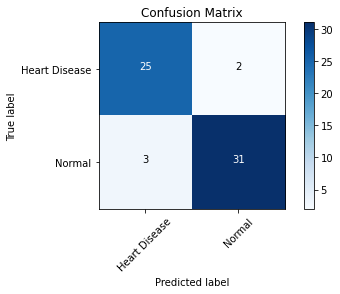

In [146]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Heart Disease','Normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [171]:
for (i , j) in zip(data_train_list,data_test_list):
    svc = SVC(kernel = 'rbf', C = 0.7, gamma = 0.1)
    svc.fit(i[0], i[1])
    acc = svc.score(j[0],j[1])*100
    print("SVC Algorithm Accuracy Score : {:.2f}%".format(acc))

SVC Algorithm Accuracy Score : 55.74%
SVC Algorithm Accuracy Score : 86.89%
SVC Algorithm Accuracy Score : 83.61%


In [172]:
y_pred = svc.predict(x_test_norm)

In [173]:
cm = confusion_matrix(y_test_norm,y_pred)
print(cm)

[[24  5]
 [ 1 31]]


Confusion matrix, without normalization
[[24  5]
 [ 1 31]]


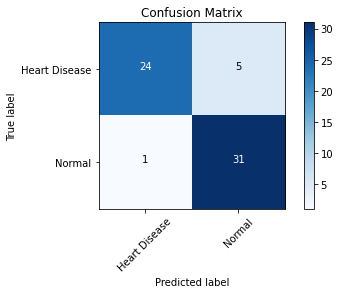

In [174]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Heart Disease','Normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [149]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1, 0.01,0.001],
                     'C': [0.5,0.7, 1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf = GridSearchCV(SVC(gamma='auto'),tuned_parameters)
clf.fit(x_train_norm, y_train_norm)
clf.cv_results_

{'mean_fit_time': array([0.00618334, 0.00658746, 0.00458641, 0.00398893, 0.00358973,
        0.00438852, 0.00378947, 0.00518441, 0.00458632, 0.00319166,
        0.00359073, 0.00299993, 0.00358815, 0.00298986, 0.00339098,
        0.00399008, 0.0045898 , 0.00359216, 0.00280089, 0.00417895,
        0.04448571, 0.50943751]),
 'std_fit_time': array([7.45664958e-04, 1.01646563e-03, 4.88480685e-04, 1.31800413e-06,
        4.88110639e-04, 7.96940760e-04, 1.16230383e-03, 7.46034311e-04,
        7.98454796e-04, 3.98659802e-04, 7.98060068e-04, 1.56672756e-05,
        4.88579587e-04, 2.53935374e-06, 1.35322536e-03, 2.66175952e-06,
        4.87362871e-04, 4.90495121e-04, 4.03440769e-04, 1.15271054e-03,
        2.89401463e-02, 3.13511418e-01]),
 'mean_score_time': array([0.00418887, 0.00318885, 0.00219665, 0.00239401, 0.00259342,
        0.00239305, 0.00239425, 0.00339265, 0.00219536, 0.00159726,
        0.00199437, 0.0017961 , 0.0013998 , 0.00199623, 0.00239911,
        0.00179529, 0.0013938 , 0.00

In [150]:
from sklearn.metrics import confusion_matrix,precision_recall_curve
cm = confusion_matrix(y_test_std,y_pred)
print(cm)

[[25  2]
 [ 3 31]]


Confusion matrix, without normalization
[[25  2]
 [ 3 31]]


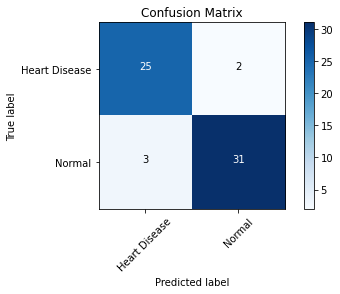

In [151]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Heart Disease','Normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [199]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 0,)
rf.fit(x_train.T, y_train.T)
y_pred = rf.predict(x_test.T)
print(y_pred)

acc = rf.score(x_test.T,y_test.T)*100

print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

[0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]
Random Forest Algorithm Accuracy Score : 86.89%


In [200]:
cm = confusion_matrix(y_test.T,y_pred)
print(cm)

[[24  3]
 [ 5 29]]


Confusion matrix, without normalization
[[24  3]
 [ 5 29]]


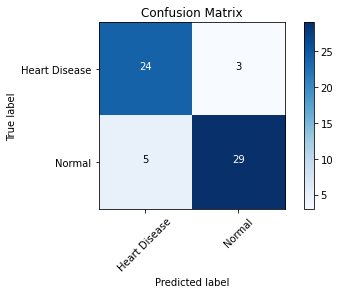

In [201]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Heart Disease','Normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [196]:
knn_classifier = KNeighborsClassifier(n_neighbors = 11)
knn_classifier.fit(x_train_norm, y_train_norm)
y_pred = rf.predict(x_test_norm)
print(y_pred)

acc = knn_classifier.score(x_test_norm,y_test_norm)*100

print("Knn Accuracy Score : {:.2f}%".format(acc))

[0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0]
Knn Accuracy Score : 85.25%


In [197]:
cm = confusion_matrix(y_test_norm,y_pred)
print(cm)

[[25  4]
 [ 5 27]]


Confusion matrix, without normalization
[[25  4]
 [ 5 27]]


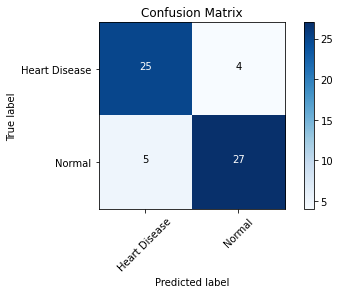

In [198]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Heart Disease','Normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [190]:
svc = SVC(kernel = 'rbf', C = 0.7, gamma = 0.1)
svc.fit(x_train_norm, y_train_norm)
y_pred = svc.predict(x_test_norm)
print(y_pred)

acc = svc.score(x_test_norm,y_test_norm)*100

print("Support Vector Machine Accuracy Score : {:.2f}%".format(acc))

[0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1
 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0]
Support Vector Machine Accuracy Score : 86.89%


In [191]:
cm = confusion_matrix(y_test_norm,y_pred)
print(cm)

[[28  1]
 [ 7 25]]


Confusion matrix, without normalization
[[28  1]
 [ 7 25]]


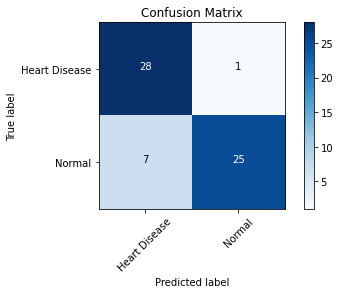

In [192]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Heart Disease','Normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [267]:
x = ['Random Forest', 'KNN', 'Logistic Regression', 'SVM']
y = [86.89,85.29,91.80,86.89]

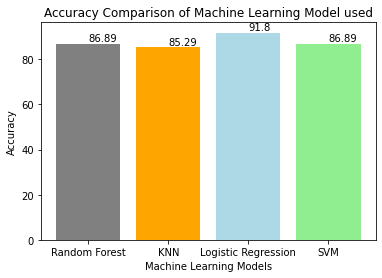

In [268]:
plt.bar(x,y, color=['grey','orange','lightblue','lightgreen'])
plt.xlabel('Machine Learning Models')
plt.ylabel("Accuracy")
plt.title('Accuracy Comparison of Machine Learning Model used')
for i, v in enumerate(y):
 plt.text( i ,v + 1, str(v))
plt.show()

In [269]:
x = ['Random Forest', 'KNN', 'Logistic Regression', 'SVM']
y = [ 0.8889, 0.8621, 0.9259, 0.9655]

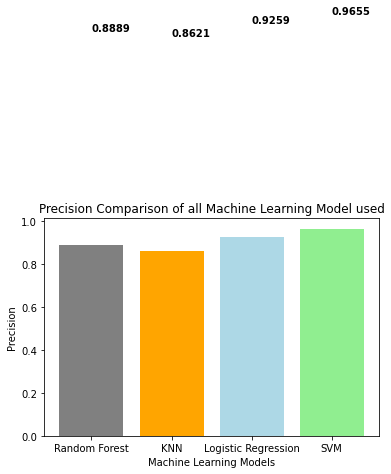

In [270]:
plt.bar(x,y, color=['grey','orange','lightblue','lightgreen'])
plt.xlabel('Machine Learning Models')
plt.ylabel("Precision")
plt.title('Precision Comparison of all Machine Learning Model used')
for i, v in enumerate(y):
 plt.text( i ,v + 1, str(v), color='black', fontweight='bold')
plt.show()

In [271]:
x = ['Random Forest', 'KNN', 'Logistic Regression', 'SVM']
y = [ 0.8276,  0.8334, 0.8929, 0.8000]

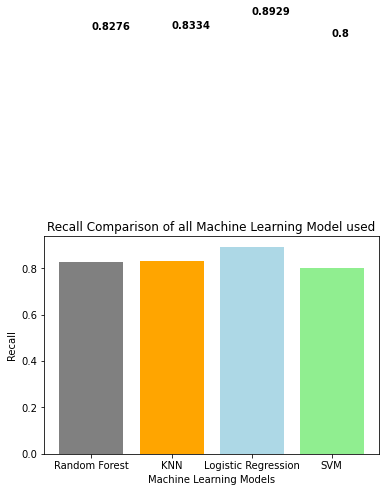

In [272]:
plt.bar(x,y, color=['grey','orange','lightblue','lightgreen'])
plt.xlabel('Machine Learning Models')
plt.ylabel("Recall")
plt.title('Recall Comparison of all Machine Learning Model used')
for i, v in enumerate(y):
 plt.text( i ,v + 1, str(v), color='black', fontweight='bold')
plt.show()

In [273]:
x = ['Random Forest', 'KNN', 'Logistic Regression', 'SVM']
y = [  0.8572, 0.8475, 0.9091, 0.8750]

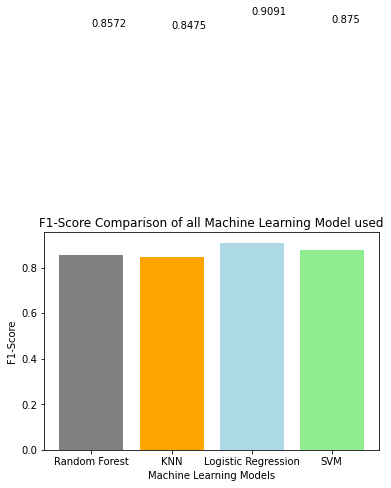

In [274]:
plt.bar(x,y, color=['grey','orange','lightblue','lightgreen'])
plt.xlabel('Machine Learning Models')
plt.ylabel("F1-Score")
plt.title('F1-Score Comparison of all Machine Learning Model used')
for i, v in enumerate(y):
 plt.text( i ,v + 1, str(v))
plt.show()